# K-Means (Driver Data)

# Data Set : Vehicle/Driver Data

For the sake of simplicity, you will take only two features : mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. 

Here are what the data represent:
* id: Unique Id of the driver .
* mean_dist_day: Mean distance driven by driver per day
* mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("driver-data.csv")

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.shape

(4000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
df["id"].nunique()

4000

In [ ]:
# We can drop "id" column as it has unique values for each observation

In [8]:
df = df.drop("id", axis= 1)

In [9]:
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


<Figure size 1200x900 with 0 Axes>

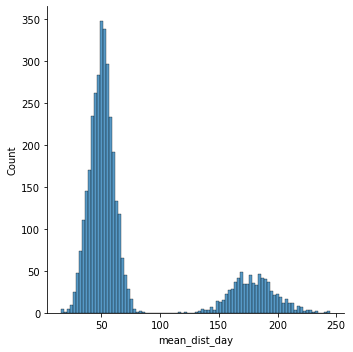

In [13]:
plt.figure(figsize= (8,6), dpi= 150)
sns.displot(data=df, x= "mean_dist_day")
plt.show()

<Figure size 1200x900 with 0 Axes>

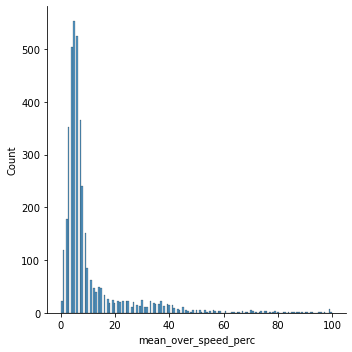

In [14]:
plt.figure(figsize= (8,6), dpi= 150)
sns.displot(data=df, x= "mean_over_speed_perc")
plt.show()

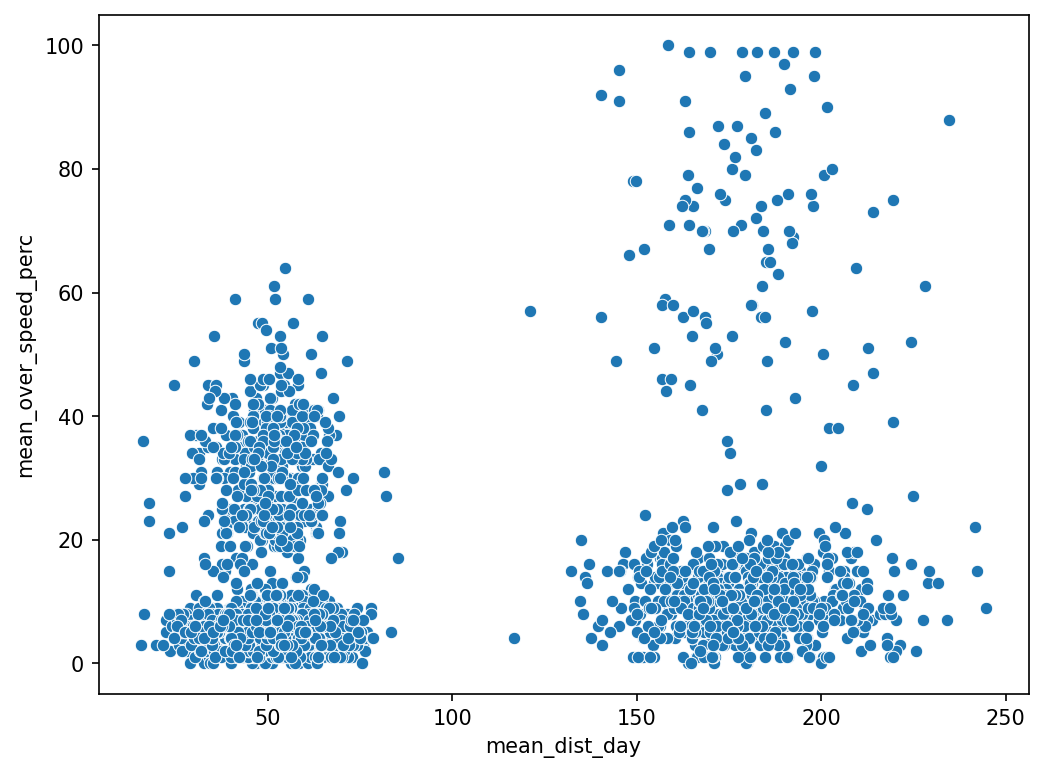

In [15]:
plt.figure(figsize= (8,6), dpi= 150)
sns.scatterplot(data=df, x= "mean_dist_day", y= "mean_over_speed_perc")
plt.show()

### Scalling:

In [17]:
sc = StandardScaler()

In [18]:
temp = sc.fit_transform(df)
df = pd.DataFrame(temp, columns= df.columns)
df.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


### Clustering:

In [20]:
kmc = KMeans(n_clusters= 2)

In [23]:
clusters2 = kmc.fit_predict(df)

In [24]:
clusters2

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
df["Cluster 2"] = clusters2

In [26]:
df.head()

,mean_dist_day,mean_over_speed_perc,Cluster 2
0,-0.089810,1.260613,0
1,-0.439773,1.041744,0
2,-0.215131,1.187656,0
3,-0.380666,0.822875,0
4,-0.401428,1.041744,0


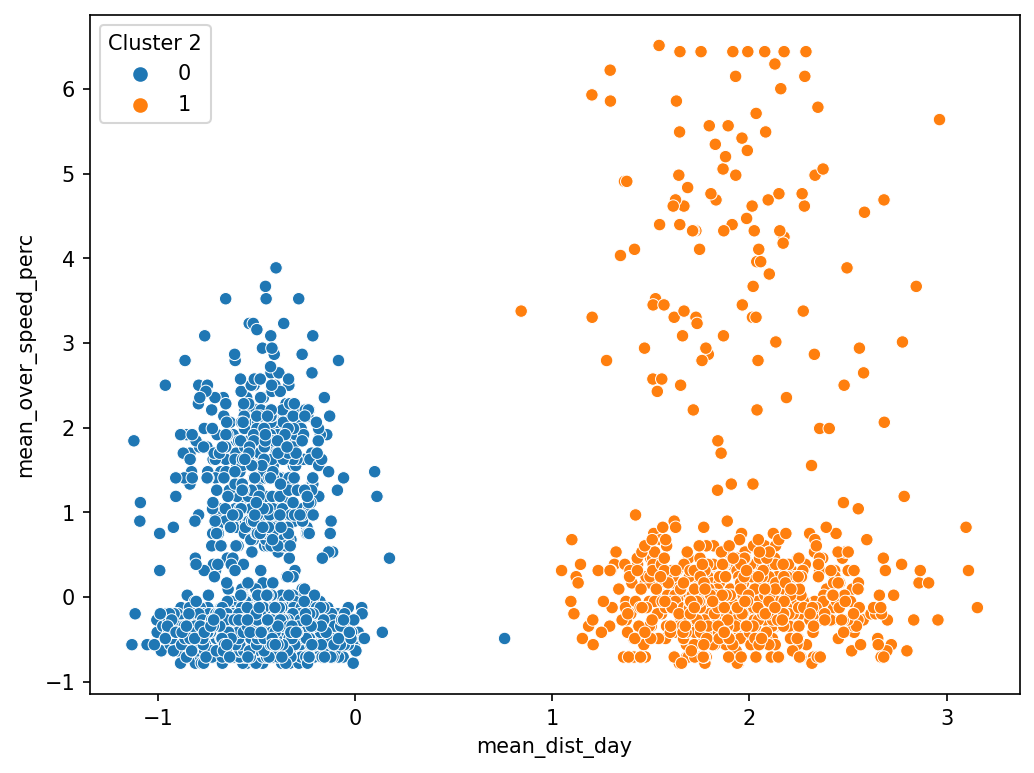

In [27]:
plt.figure(figsize= (8,6), dpi= 150)
sns.scatterplot(data=df, x= "mean_dist_day", y= "mean_over_speed_perc", hue= "Cluster 2")
plt.show()

In [28]:
kmc.cluster_centers_

array([[-0.48581565, -0.13816168],
       [ 1.94630276,  0.55351131]])

In [30]:
# 3 Clusters:

In [31]:
df= df.drop("Cluster 2", axis= 1)

In [32]:
df.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [33]:
kmc = KMeans(n_clusters= 3)

In [34]:
clusters3 = kmc.fit_predict(df)

In [35]:
clusters3

array([2, 1, 2, ..., 0, 0, 0])

In [36]:
df["Clusters"] = clusters3

In [37]:
df.head()

,mean_dist_day,mean_over_speed_perc,Clusters
0,-0.089810,1.260613,2
1,-0.439773,1.041744,1
2,-0.215131,1.187656,2
3,-0.380666,0.822875,1
4,-0.401428,1.041744,1


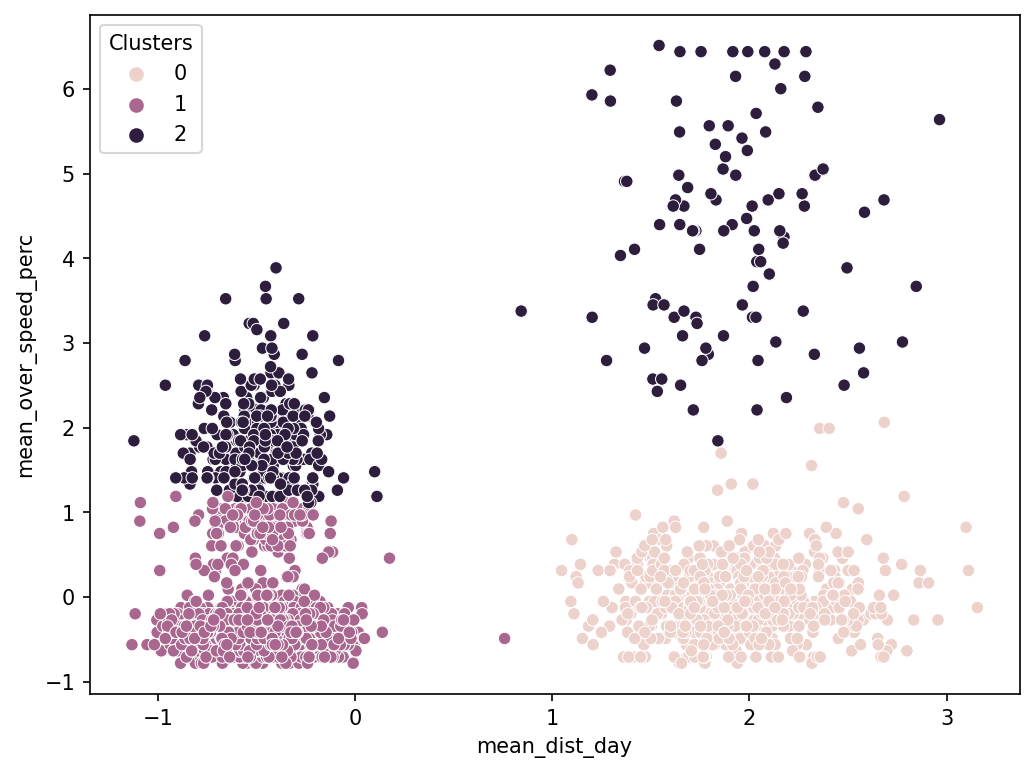

In [39]:
plt.figure(figsize= (8,6), dpi= 150)
sns.scatterplot(data=df, x= "mean_dist_day", y= "mean_over_speed_perc", hue= "Clusters")
plt.show()

In [40]:
kmc.cluster_centers_

array([[ 1.95279463, -0.01664897],
       [-0.48707569, -0.34543211],
       [ 0.14575993,  2.51698215]])

In [41]:
# 4 Clusters:

In [42]:
df= df.drop("Clusters", axis= 1)

In [43]:
df.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [44]:
kmc = KMeans(n_clusters= 4)

In [45]:
clusters4 = kmc.fit_predict(df)

In [46]:
clusters4

array([3, 3, 3, ..., 1, 1, 1])

In [47]:
df["Clusters"] = clusters4

In [48]:
df.head()

,mean_dist_day,mean_over_speed_perc,Clusters
0,-0.089810,1.260613,3
1,-0.439773,1.041744,3
2,-0.215131,1.187656,3
3,-0.380666,0.822875,3
4,-0.401428,1.041744,3


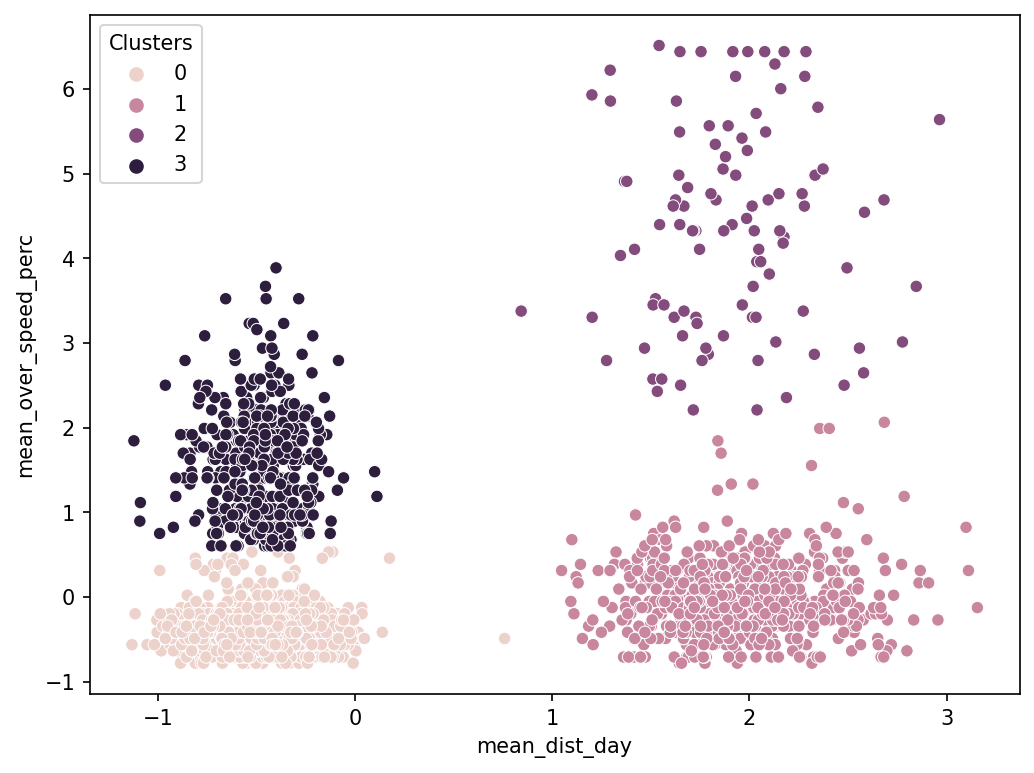

In [49]:
plt.figure(figsize= (8,6), dpi= 150)
sns.scatterplot(data=df, x= "mean_dist_day", y= "mean_over_speed_perc", hue= "Clusters")
plt.show()

In [50]:
kmc.cluster_centers_

array([[-0.48678423, -0.40249736],
       [ 1.95263225, -0.0139714 ],
       [ 1.90400473,  4.34582367],
       [-0.47952334,  1.57909169]])

In [52]:
# Computing and Comparing Silhouette Score

In [53]:
df = df.drop("Clusters", axis= 1)

In [54]:
df.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [55]:
sil_score = []

for k in range(2,11):
    
    kmc = KMeans(n_clusters= k)
    
    clusters = kmc.fit_predict(df)
    
    sil_score.append(silhouette_score(df, clusters))

In [56]:
sil_score

[0.7075955632562002,
 0.7636008195603978,
 0.7843727073779272,
 0.7341393562942123,
 0.6695505579773653,
 0.6651657958270236,
 0.3591067347000502,
 0.3606651573628951,
 0.36079232218973983]

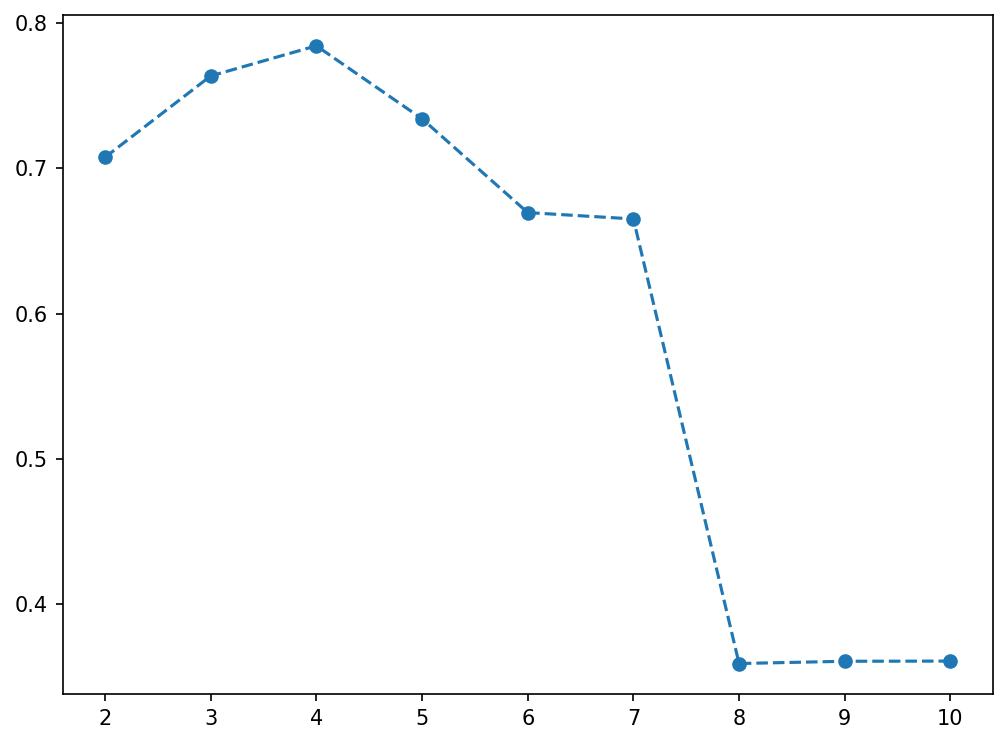

In [58]:
plt.figure(figsize= (8,6), dpi= 150)
plt.plot(range(2,11), sil_score, "o--")
plt.show()

In [59]:
# 4 Clusters Seem Optimum.